In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv("C:/Users/Ayaan/OneDrive/Desktop/Dataset/Dataset/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

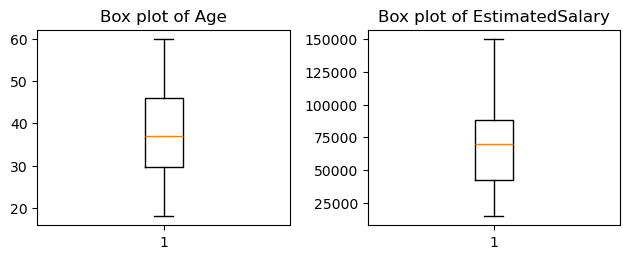

In [19]:
def showOutliers():
   
    for i, col in enumerate( ['Age','EstimatedSalary']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [23]:
# Normalize numerical columns using MinMaxScaler
columns_to_check=['EstimatedSalary']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[columns_to_check] = scaler.fit_transform(df_scaled[columns_to_check])

print("\nAfter Scaling (Normalization):")
df_scaled



After Scaling (Normalization):


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,0.029630,0
1,15810944,Male,35,0.037037,0
2,15668575,Female,26,0.207407,0
3,15603246,Female,27,0.311111,0
4,15804002,Male,19,0.451852,0
...,...,...,...,...,...
395,15691863,Female,46,0.192593,1
396,15706071,Male,51,0.059259,1
397,15654296,Female,50,0.037037,1
398,15755018,Male,36,0.133333,0


In [24]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [28]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [29]:
print("Confusion Matrix:")
print(cm)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[65  3]
 [ 8 24]]
True Positives (TP): 24
False Positives (FP): 3
True Negatives (TN): 65
False Negatives (FN): 8
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


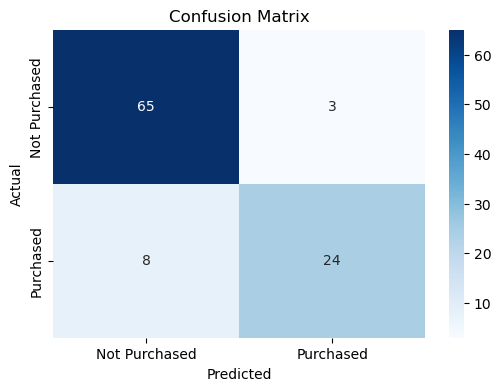

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()